[View in Colaboratory](https://colab.research.google.com/github/kleysonr/google-colab/blob/opencv/homography.ipynb)

# Homography

### Introdução

No campo da visão computacional, quaisquer duas imagens da mesma superfície plana no espaço são relacionadas por uma homografia.

Mas o que basicamente isso significa ? Significa que duas imagens, com diferentes perspectivas de visão podem ser trazidas para um mesmo plano comum através de uma matrix (calculada) de transformação.

Além de trazer duas imagens para o mesmo plano, podemos usar a técnica para transpor uma dada imagen para uma outra perspectiva de visão, fazendo o mapeamento de pontos da origem para novas localizações no novo plano, calculando então nossa matrix de homografia.

Veja o exemplo abaixo, a imagem da esquerda (original) possui uma dada perspectiva de visão, então aplicando uma transformação da perspectiva podemos alterar a imagem para um diferente plano.

É como se tivessemos uma câmera filmando um dado campo de futebol, então começamos a movimentar a câmera em diversas direções, rotações e ângulos até conseguirmos uma visão do objeto da forma que esperamos. Então esse processo de "simular" a movimentação da câmera, é basicamente a operação de alterar uma imagem de uma perspectiva para outra.

![alt text](http://www.barradeau.com/nicoptere/covers/homography.jpg)

Está fora do escopo desse notebook entrar nos detalhes técnicos e a matemática aplicada no processo, pois vários textos e vídeos podem ser encontrados na internet que explicam muito melhor do que eu poderia fazer.

Logo o objetivo desse notebook e trazer um entendimento do que homografia é, e como ele pode ser aplicado em um exemplo real.

### Utilização

A técnica pode ser utilizada em variados cenários, como por exemplo:

* **Realidade Aumentada**

![alt text](https://docs.opencv.org/3.4.1/homography_pose_estimation.jpg)

* **Correção e/ou remoção de perspectiva**

![alt text](https://docs.opencv.org/3.4.1/homography_perspective_correction.jpg)

* **Imagens panôramicas**

![alt text](https://docs.opencv.org/3.4.1/homography_panorama_stitching.jpg)

* **Alinhamento de imagens**

![alt text](https://www.learnopencv.com/wp-content/uploads/2018/03/image-alignment-using-opencv.jpg)

* **Virtuall billboard**

![alt text](http://f.i.uol.com.br/folha/esporte/images/13295184.jpeg)

* **Entre vários outros**

### Exemplo

No exemplo abaixo, iremos implementar uma versão simplificada de um **Virtual billboard** utilizando OpenCV.

## Pré-requisito

Instalação de um cliente SVN para que possamos fazer o download de uma única pasta de um repositório Github sem ter que clonar o repositório por completo.

In [2]:
!apt-get install subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
subversion is already the newest version (1.9.7-4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


## Download Files

No respectivo diretório temos a imagem de uma piscina que será utilizada como base, bem como 3 diferentes bandeiras que serão adicionadas sobre a imagem base em diferente raias.

In [3]:
import os

Download_files = 'Yes' #@param ["No", "Yes"]
Github_repo_URL = 'https://github.com/kleysonr/google-colab' #@param {type:"string"}
branch = 'opencv' #@param {type:"string"}
Folder_for_download = '/homography' #@param {type:"string"}

if Download_files == 'Yes':
  Folder_for_download = Folder_for_download.lstrip('\/')
  if branch == 'master':
    url = os.path.join(Github_repo_URL, 'trunk', Folder_for_download)
  else:
    url = os.path.join(Github_repo_URL, 'branches', branch, Folder_for_download)
  !svn checkout {url}
  
print('Download Finished.')

A    homography/brasil.png
A    homography/espanha.png
A    homography/piscina.jpg
A    homography/portugal.png
Checked out revision 5.
Download Finished.


In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Funções de apoio

Algumas funções de apoio para utilização.

**homography()** - Encapsular a lógica de cálculo da matrix H usando métodos do OpenCV. **srcImagePoints** são pontos da imagem que será alterada, para um outro plano representado pelos pontos definidos no **baseImagePoints**.

**showImage()** - Função para mostrar a imagem.

In [0]:

def homography(baseImagePoints, srcImagePoints):
    (h, status) = cv2.findHomography(np.array(baseImagePoints, dtype = np.float32), np.array(srcImagePoints, dtype = np.float32))

    return (h, status)
  
def showImage(opencvImage):
    plt.figure()
    plt.axis("off")
    plt.imshow(cv2.cvtColor(opencvImage, cv2.COLOR_BGR2RGB))
    plt.show()

## Exibir as imagens

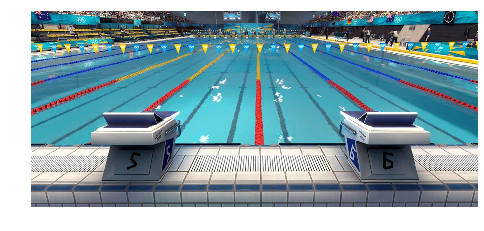

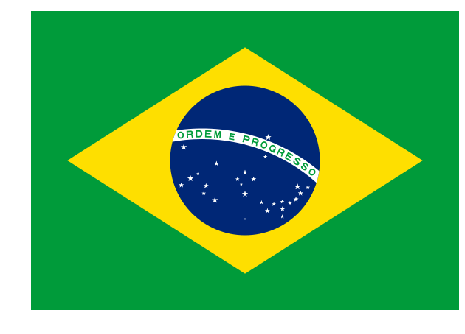

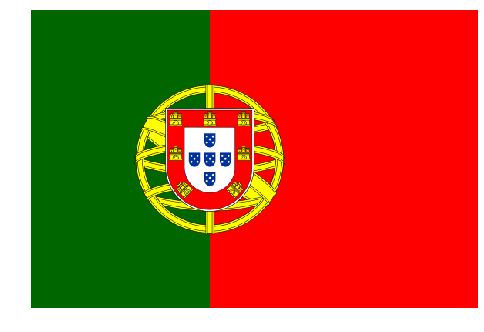

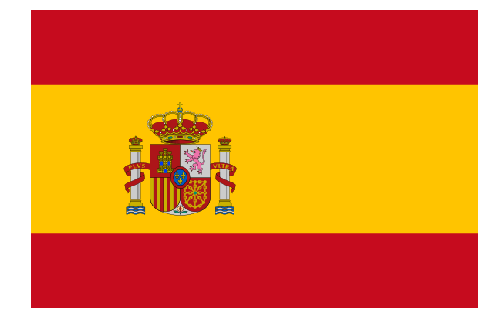

In [6]:
baseImage = cv2.imread('homography/piscina.jpg')
brasilImg = cv2.imread('homography/brasil.png')
portugalImg = cv2.imread('homography/portugal.png')
espanhaImg = cv2.imread('homography/espanha.png')

showImage(baseImage)
showImage(brasilImg)
showImage(portugalImg)
showImage(espanhaImg)


## Imagem base

Vamos definir a localização de cada bandeira na imagem base.

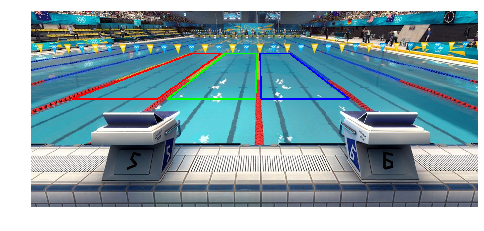

In [7]:
# Bandeira do Brasil
baseImagePointsBrasil = [ [790,132], [972,270], [703,270], [700,132] ]

# Bandeira de Portugal
baseImagePointsPortugal = [ [690,132], [686,270], [417,270], [595,132] ]

# Bandeira da Espanha
baseImagePointsEspanha = [ [580,132], [387,270], [125,270], [491,132] ]

# Cria uma cópia da imagem base
clone = baseImage.copy()

# Desenha os pontos para cada bandeira para validação
cv2.line(clone,(790,132),(972,270),(255,0,0),3)
cv2.line(clone,(972,270),(703,270),(255,0,0),3)
cv2.line(clone,(703,270),(700,132),(255,0,0),3)
cv2.line(clone,(700,132),(790,132),(255,0,0),3)

cv2.line(clone,(690,132),(686,270),(0,255,0),3)
cv2.line(clone,(686,270),(417,270),(0,255,0),3)
cv2.line(clone,(417,270),(595,132),(0,255,0),3)
cv2.line(clone,(595,132),(690,132),(0,255,0),3)

cv2.line(clone,(580,132),(387,270),(0,0,255),3)
cv2.line(clone,(387,270),(125,270),(0,0,255),3)
cv2.line(clone,(125,270),(491,132),(0,0,255),3)
cv2.line(clone,(491,132),(580,132),(0,0,255),3)

showImage(clone)


## Cálculo da matriz H e aplicação da transformação

Cada bandeira terá definido como pontos base os quatro cantos da imagem, sendo:
> **top-left, top-right, bottom-right, bottom-left**

Pegando como exemplo a bandeira do Brasil, teremos a seguinte tabela de mapeamento:

| baseImagePointsBrasil | brasilSrcPoints |
|---|---|
| (790,132) | (0,0) |
| (972,270) | (largura, 0) |
| (703,270) | (largura, altura) |
| (700,132) | (0, altura) |

Ou seja, os quatro cantos da imagem da bandeira serão transpostos para as respectivas posições na imagem base.

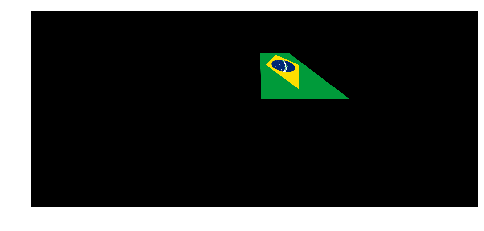

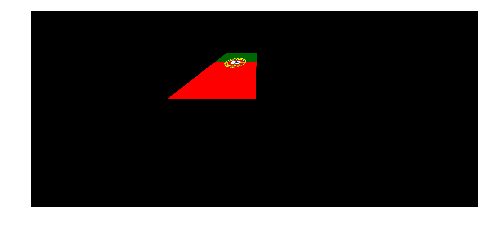

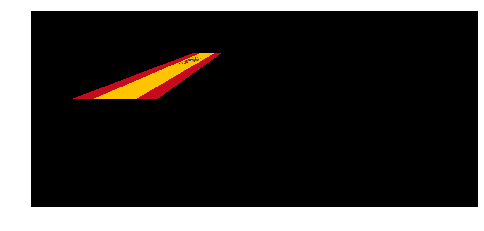

In [8]:
brasilSrcPoints   = [[0, 0], [brasilImg.shape[1] - 1, 0]  , [brasilImg.shape[1] - 1, brasilImg.shape[0] - 1]    , [0, brasilImg.shape[0] - 1]]
portugalSrcPoints = [[0, 0], [portugalImg.shape[1] - 1, 0], [portugalImg.shape[1] - 1, portugalImg.shape[0] - 1], [0, portugalImg.shape[0] - 1]]
espanhaSrcPoints  = [[0, 0], [espanhaImg.shape[1] - 1, 0] , [espanhaImg.shape[1] - 1, espanhaImg.shape[0] - 1]  , [0, espanhaImg.shape[0] - 1]]

# Calcula a matrix de transformação para a bandeira do Brasil
(h, status) = homography(brasilSrcPoints, baseImagePointsBrasil)

# Transforma a bandeira baseado na matrix H
brasilImgH = cv2.warpPerspective(brasilImg, h, (baseImage.shape[1], baseImage.shape[0]))

# Calcula a matrix de transformação para a bandeira de Portugal
(h, status) = homography(portugalSrcPoints, baseImagePointsPortugal)

# Transforma a bandeira baseado na matrix H
portugalImgH = cv2.warpPerspective(portugalImg, h, (baseImage.shape[1], baseImage.shape[0]))

# Calcula a matrix de transformação para a bandeira da Espanha
(h, status) = homography(espanhaSrcPoints, baseImagePointsEspanha)

# Transforma a bandeira baseado na matrix H
espanhaImgH = cv2.warpPerspective(espanhaImg, h, (baseImage.shape[1], baseImage.shape[0]))

showImage(brasilImgH)
showImage(portugalImgH)
showImage(espanhaImgH)

## Merge

Abaixo o merge de todas as imagens em uma só com o resultado esperado de um virtual billboard.

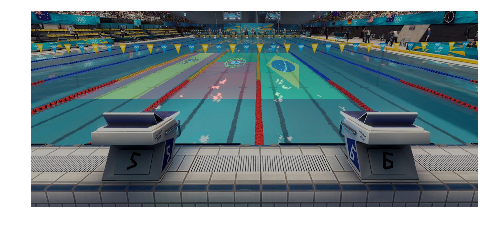

In [10]:
merge = cv2.bitwise_xor(portugalImgH, brasilImgH)
merge = cv2.bitwise_xor(merge, espanhaImgH)
finalImg = cv2.addWeighted(merge,0.3,baseImage,0.7,0)

showImage(finalImg)

@Author: Kleyson Rios

@Email: kleysonr@gmail.com

@https://www.linkedin.com/in/kleyson-rios-60347312/